## ENTRENAMIENTO MODELO

In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import tree
import pickle
import yaml

In [348]:
vino_processed = pd.read_csv('../data/processed.csv', index_col=0)
vino_processed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [349]:
X = vino_processed.drop(columns=['good quality'])
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [350]:
y = vino_processed['good quality']

In [351]:
num_columns = X.columns.tolist()
num_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [353]:
print((len(X_train), len(X_test)))
print((len(y_train), len(y_test)))

(3918, 980)
(3918, 980)


Teniendo en cuenta que tenemos que predecir el nivel de la calidad del vino, se tratará de un ejercicio de clasificación. Vamos a escalar nuestros datos primero.

In [354]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **1. REGRESIÓN LOGÍSTICA**

In [355]:
logisticRegression = LogisticRegression(solver='liblinear')
logisticRegression.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [356]:
pred_logreg = logisticRegression.predict(X_test)
print(classification_report(y_test, pred_logreg, zero_division=1))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58       318
           1       0.79      0.87      0.83       662

    accuracy                           0.76       980
   macro avg       0.72      0.69      0.70       980
weighted avg       0.75      0.76      0.75       980



In [357]:
print ("Accuracy global:", round(metrics.accuracy_score(y_test, pred_logreg), 2))

Accuracy global: 0.76


### ***2. RANDOM FOREST***

In [358]:
rf = RandomForestClassifier(n_estimators= 100, random_state=21)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [359]:
importances = rf.feature_importances_
for feature_name, importance in zip(num_columns, importances):
    print(f"{feature_name}: {importance}")

fixed acidity: 0.06744473122658111
volatile acidity: 0.11887744235853975
citric acid: 0.08014016846581655
residual sugar: 0.08034658624346246
chlorides: 0.0828517335669575
free sulfur dioxide: 0.09478344338370008
total sulfur dioxide: 0.08857047579166469
density: 0.11211448441326405
pH: 0.07197784520087486
sulphates: 0.06414762557092925
alcohol: 0.13874546377820973


In [360]:
pred_rf = rf.predict(X_test)
rf.score(X_test, y_test)

0.8367346938775511

In [361]:
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf, zero_division=1))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       318
           1       0.86      0.90      0.88       662

    accuracy                           0.84       980
   macro avg       0.82      0.80      0.81       980
weighted avg       0.83      0.84      0.83       980



In [362]:
print ("Accuracy global:", round(metrics.accuracy_score(y_test, pred_rf), 2))

Accuracy global: 0.84


Esta puntuación parece que ha mejorado algo la anterior. Visualicemos nuestro árbol.

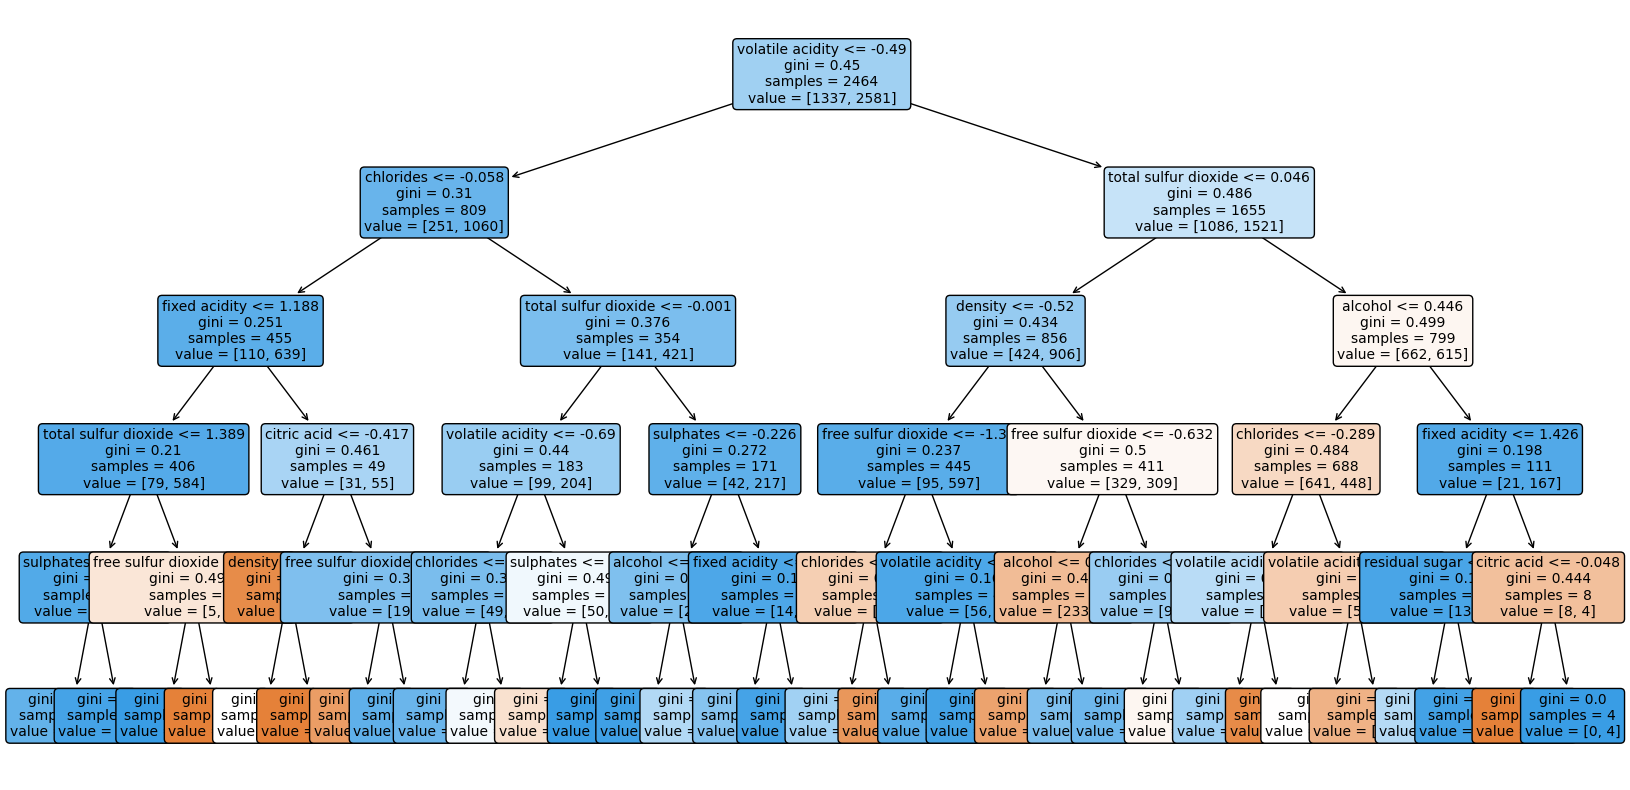

In [363]:
modelo_arbol = RandomForestClassifier(max_depth=5)
modelo_arbol.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(modelo_arbol.estimators_[0], feature_names=num_columns, filled=True, rounded=True, fontsize=10)
plt.show()

### ***3. GRADIENT BOOST***

In [364]:
gb = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=21)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=21)

In [365]:
pred_gb = gb.predict(X_test)
print(classification_report(y_test, pred_gb, zero_division=1))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       318
           1       0.84      0.84      0.84       662

    accuracy                           0.78       980
   macro avg       0.75      0.75      0.75       980
weighted avg       0.78      0.78      0.78       980



In [366]:
print ("Accuracy global:", round(metrics.accuracy_score(y_test, pred_gb), 2))

Accuracy global: 0.78


### **4. SVM**

In [367]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [368]:
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc, zero_division=1))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       318
           1       0.82      0.87      0.84       662

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980



In [369]:
print ("Accuracy global:", round(metrics.accuracy_score(y_test, pred_svc), 2))

Accuracy global: 0.78


### **5. KNN**

In [370]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [371]:
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn, zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       318
           1       0.85      0.85      0.85       662

    accuracy                           0.80       980
   macro avg       0.77      0.77      0.77       980
weighted avg       0.80      0.80      0.80       980



In [372]:
print ("Accuracy global:", round(metrics.accuracy_score(y_test, pred_knn), 2))

Accuracy global: 0.8


Como el modelo que me ha dado mejor resultado es el *Random Forest*, voy a hiperparametrizarlo para ver si puedo mejorar los resultados.

#### HIPERPARAMETRIZACIÓN DEL *RANDOM FOREST*

In [373]:
n_estimators = np.random.uniform(70, 80, 5).astype(int)
max_features = np.random.normal(6, 3, 5).astype(int)

max_features[max_features <= 0] = 1
max_features[max_features > X.shape[1]] = X.shape[1]

hyperparameters = {'n_estimators': list(n_estimators),
                   'max_features': list(max_features)}

print (hyperparameters)

{'n_estimators': [75, 73, 75, 74, 79], 'max_features': [6, 4, 8, 6, 5]}


In [374]:
randomCV = RandomizedSearchCV(RandomForestClassifier(), param_distributions=hyperparameters, n_iter=20)
randomCV.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': [6, 4, 8, 6, 5],
                                        'n_estimators': [75, 73, 75, 74, 79]})

In [375]:
best_n_estim      = randomCV.best_params_['n_estimators']
best_max_features = randomCV.best_params_['max_features']

print("El mejor valor de n_estimators es: {:5d}".format(best_n_estim))

El mejor valor de n_estimators es:    79


In [376]:
print("El mejor valor de max_features es: {:5d}".format(best_max_features))

El mejor valor de max_features es:     5


In [377]:
rf_2 = RandomForestClassifier(n_estimators=best_n_estim,
                            max_features=best_max_features)

rf_2.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=79)

In [378]:
pred_rf_2 = rf_2.predict(X_test)

In [380]:
print (metrics.classification_report(y_test, pred_rf_2, zero_division=1))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       318
           1       0.87      0.90      0.89       662

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.82       980
weighted avg       0.84      0.84      0.84       980



In [381]:
print ("Accuracy global:", round(metrics.accuracy_score(y_test, pred_rf_2), 2))

Accuracy global: 0.84


Este es el modelo que da mejor resultado.

### **MODELO NO SUPERVISADO: PCA**

In [382]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [383]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [384]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942])

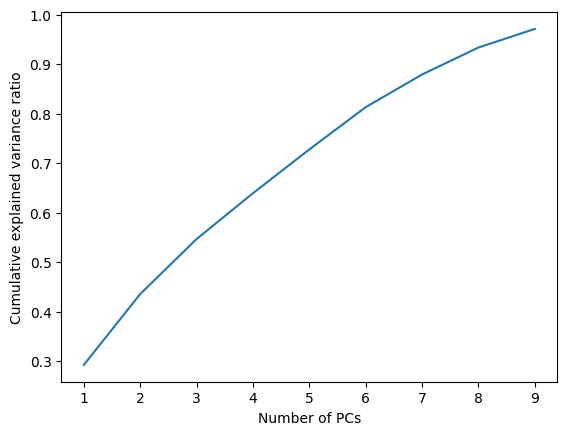

In [385]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,10)))
plt.xlabel('Number of PCs')
plt.ylabel("Cumulative explained variance ratio");

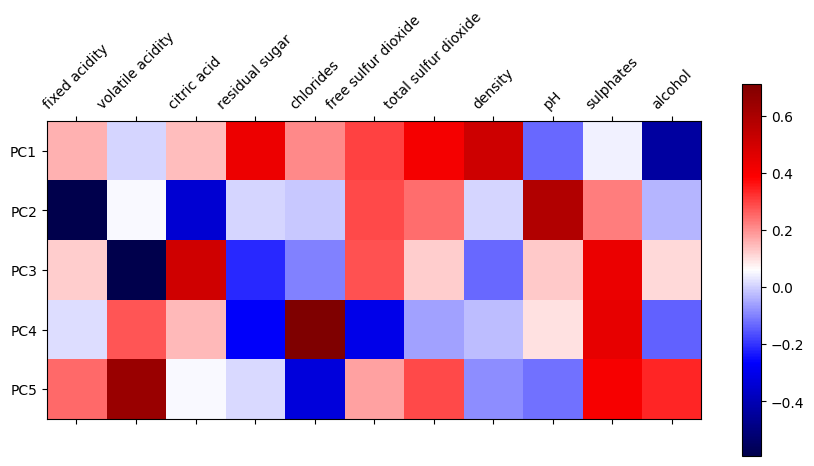

In [386]:
plt.matshow(pca.components_[:5], cmap='seismic')
plt.yticks([0,1,2,3,4],['PC1','PC2','PC3','PC4','PC5'])
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.colorbar()
plt.show()

In [387]:
pd.DataFrame(pca.components_[:5], columns=X.columns, index=['PC1','PC2','PC3','PC4','PC5'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.157218,0.005089,0.144050,0.427408,0.212011,0.300334,0.406652,0.511524,-0.128832,0.043379,-0.437238
PC2,-0.587558,0.051728,-0.345295,0.008749,-0.008800,0.290355,0.244032,0.006297,0.581344,0.222695,-0.035569
PC3,0.121368,-0.590971,0.504397,-0.214320,-0.102367,0.279410,0.124375,-0.129203,0.126672,0.433244,0.105903
PC4,0.018584,0.274115,0.148514,-0.273765,0.710712,-0.305585,-0.060456,-0.022061,0.097753,0.442060,-0.141079
PC5,0.251048,0.642617,0.053905,0.011391,-0.328628,0.176912,0.293010,-0.084588,-0.119826,0.400585,0.337419


In [388]:
with open('../models/modelo.pkl', 'wb') as archivo:
    pickle.dump(rf, archivo)

In [326]:
# with open("../models/model_config.yaml", "w") as c:
    # yaml.dump(rf, c)